In [ ]:
# The code was removed by Watson Studio for sharing.

# Battle of the neighbourhood

The Problem to be sovled:

An investor want to pick up a location in Chicagp to open a new restaurant.

Background introduction:

Chicago is one of the most diverse city in the US and there are lots of famous tourist attractions and world level financial and business centers. This well - developed city is also famous for its opportunities for the business starters. The client wants to pick a locaction to start a new restaurant. As we all know there is a saying about restaurant business " it is all about location, location and location". The large population of the city provide a good source of the customers for restaurants. However, there are lots of challenges out there too. If you walk around the city, you will find it is very easy to find a restaurant that can fit the need of different customers. This means that the market is very competitive. Beside the competition, the investor wants to consider the safty of the environment. Low crime rate is especially important for our investor too.

As a data scienctist, in order to help the investor, I analyze the Chicago restaurants and the crime data so that the investor can use them to analyze the market before making investment decision.

Data source:

The data that is needed for the project includes the followings:

Top 30 venues to visit in chicago from foursquare. The list of the restaurants in the surrounding area from foursquare. the crime data from the chicago police department.


In [ ]:
https://github.com/davidcolton/Coursera_Capstone
https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/e0e3d10d-2910-4fa8-92f5-bfa046561c22/view?access_token=74228834da382a5d9e2d0b61b664ae3bd14ac8642bf2ec77cde27eb83e10855a

### Explore Chicago Crime Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import os

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 12}
mpl.rc('font', **font)

In [3]:
!pip install folium

     |████████████████████████████████| 92kB 8.4MB/s eta 0:00:011


In [4]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins
from geopy.geocoders import Nominatim

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores



In [6]:
# The code was removed by Watson Studio for sharing.

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JC497784,11/03/2019 11:40:00 AM,032XX N CLARK ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1924,44.0,06,NaN,NaN,NaN,NaN,NaN
1,JC497415,11/03/2019 04:30:00 AM,107XX S PEORIA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),N,N,2233,34.0,14,NaN,NaN,NaN,NaN,NaN
2,JC537116,12/05/2019 02:30:00 PM,013XX W GLENLAKE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,N,N,2433,48.0,06,NaN,NaN,NaN,NaN,NaN
3,JD121242,01/19/2020 07:00:00 AM,013XX N ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,N,1423,26.0,14,1158829.0,1908693.0,41.905188,-87.692009,"(41.905188015, -87.692009209)"
4,JD121590,01/19/2020 08:00:00 PM,056XX W MADISON ST,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,N,N,1513,29.0,04B,1138747.0,1899456.0,41.880229,-87.766002,"(41.880228833, -87.766002008)"


In [7]:
crime.shape

(257425, 17)

In [8]:
crime.columns = crime.columns.str.strip()

In [9]:
crime_keep_columns = ['CASE#',
                      'DATE  OF OCCURRENCE',
                      'BLOCK', 
                      ' PRIMARY DESCRIPTION',
                      'WARD',
                      'LATITUDE',
                      'LONGITUDE']


In [10]:
crime.columns = crime.columns.str.replace('\s{2,}', ' ')

In [11]:
crime.columns = crime.columns.str.replace('#', '')


In [12]:
crime.columns = crime.columns.str.replace(' ', '_')

In [13]:
crime.columns = crime.columns.str.lower()

In [14]:
crime.date_of_occurrence.replace(to_replace="(09/\\d+)/2017", value=r"\1/2018", regex=True, inplace=True)

In [15]:
crime.dtypes

case                      object
date_of_occurrence        object
block                     object
iucr                      object
primary_description       object
secondary_description     object
location_description      object
arrest                    object
domestic                  object
beat                       int64
ward                     float64
fbi_cd                    object
x_coordinate             float64
y_coordinate             float64
latitude                 float64
longitude                float64
location                  object
dtype: object

In [16]:
crime['date_of_occurrence'] =  pd.to_datetime(crime['date_of_occurrence'], format='%m/%d/%Y %I:%M:%S %p')

In [17]:
crime['hour'] = crime['date_of_occurrence'].dt.hour
crime['day_name'] = crime['date_of_occurrence'].dt.day_name()
crime['day'] = crime['date_of_occurrence'].dt.dayofweek + 1
crime['month_name'] = crime['date_of_occurrence'].dt.month_name()
crime['month'] = crime['date_of_occurrence'].dt.month
crime['year'] = crime['date_of_occurrence'].dt.year
crime['year_month'] = crime['date_of_occurrence'].dt.to_period('M')

In [18]:
crime['zip'] = crime.block.str.split(' ').str[0]
crime['street'] = crime.block.str.split(' ').str[1:].apply(', '.join)

In [19]:
crime.head(5)

,case,date_of_occurrence,block,iucr,primary_description,secondary_description,location_description,arrest,domestic,beat,ward,fbi_cd,x_coordinate,y_coordinate,latitude,longitude,location,hour,day_name,day,month_name,month,year,year_month,zip,street
0,JC497784,2019-11-03 11:40:00,032XX N CLARK ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1924,44.0,06,NaN,NaN,NaN,NaN,NaN,11,Sunday,7,November,11,2019,2019-11,032XX,"N, CLARK, ST"
1,JC497415,2019-11-03 04:30:00,107XX S PEORIA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),N,N,2233,34.0,14,NaN,NaN,NaN,NaN,NaN,4,Sunday,7,November,11,2019,2019-11,107XX,"S, PEORIA, ST"
2,JC537116,2019-12-05 14:30:00,013XX W GLENLAKE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,N,N,2433,48.0,06,NaN,NaN,NaN,NaN,NaN,14,Thursday,4,December,12,2019,2019-12,013XX,"W, GLENLAKE, AVE"
3,JD121242,2020-01-19 07:00:00,013XX N ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,N,1423,26.0,14,1158829.0,1908693.0,41.905188,-87.692009,"(41.905188015, -87.692009209)",7,Sunday,7,January,1,2020,2020-01,013XX,"N, ROCKWELL, ST"
4,JD121590,2020-01-19 20:00:00,056XX W MADISON ST,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,N,N,1513,29.0,04B,1138747.0,1899456.0,41.880229,-87.766002,"(41.880228833, -87.766002008)",20,Sunday,7,January,1,2020,2020-01,056XX,"W, MADISON, ST"


In [20]:
crime.isna().sum()

case                        0
date_of_occurrence          0
block                       0
iucr                        0
primary_description         0
secondary_description       0
location_description      988
arrest                      0
domestic                    0
beat                        0
ward                       15
fbi_cd                      0
x_coordinate             1481
y_coordinate             1481
latitude                 1481
longitude                1481
location                 1481
hour                        0
day_name                    0
day                         0
month_name                  0
month                       0
year                        0
year_month                  0
zip                         0
street                      0
dtype: int64

In [21]:
crime.dropna(inplace=True)
crime.reindex()
crime.head()

,case,date_of_occurrence,block,iucr,primary_description,secondary_description,location_description,arrest,domestic,beat,ward,fbi_cd,x_coordinate,y_coordinate,latitude,longitude,location,hour,day_name,day,month_name,month,year,year_month,zip,street
3,JD121242,2020-01-19 07:00:00,013XX N ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,N,1423,26.0,14,1158829.0,1908693.0,41.905188,-87.692009,"(41.905188015, -87.692009209)",7,Sunday,7,January,1,2020,2020-01,013XX,"N, ROCKWELL, ST"
4,JD121590,2020-01-19 20:00:00,056XX W MADISON ST,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,N,N,1513,29.0,04B,1138747.0,1899456.0,41.880229,-87.766002,"(41.880228833, -87.766002008)",20,Sunday,7,January,1,2020,2020-01,056XX,"W, MADISON, ST"
5,JD121735,2020-01-19 23:00:00,008XX E 82ND ST,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,631,8.0,06,1183467.0,1850812.0,41.745817,-87.603314,"(41.745817472, -87.603313617)",23,Sunday,7,January,1,2020,2020-01,008XX,"E, 82ND, ST"
6,JD120911,2020-01-19 02:40:00,014XX W LAKE ST,0460,BATTERY,SIMPLE,OTHER,Y,N,1224,27.0,08B,1166633.0,1901539.0,41.885393,-87.663548,"(41.885393253, -87.663547848)",2,Sunday,7,January,1,2020,2020-01,014XX,"W, LAKE, ST"
7,JD120871,2020-01-19 01:16:00,033XX W GRAND AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,Y,N,1121,26.0,15,1153666.0,1906784.0,41.900054,-87.711026,"(41.900053897, -87.711025503)",1,Sunday,7,January,1,2020,2020-01,033XX,"W, GRAND, AVE"


Text(0.0, 1.0, 'Count of Cases Per Month')

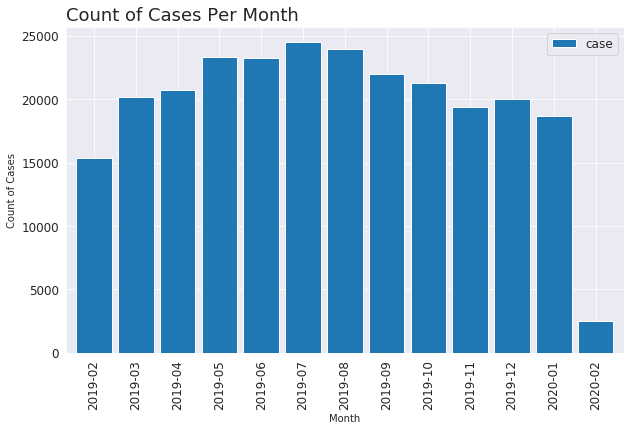

In [22]:
crime.groupby('year_month').count().plot(y = 'case', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a Tuesday]')

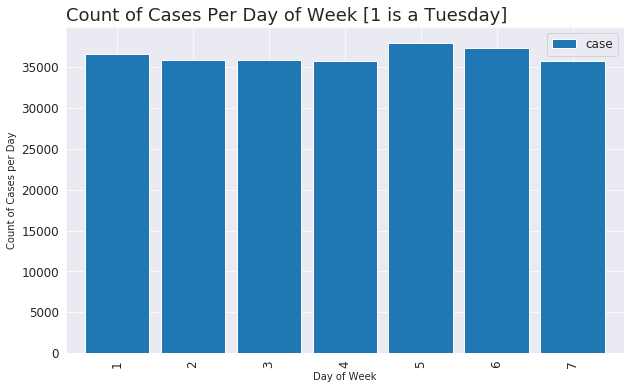

In [23]:
crime.groupby('day').count().plot(y = 'case',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a Tuesday]', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Hour]')

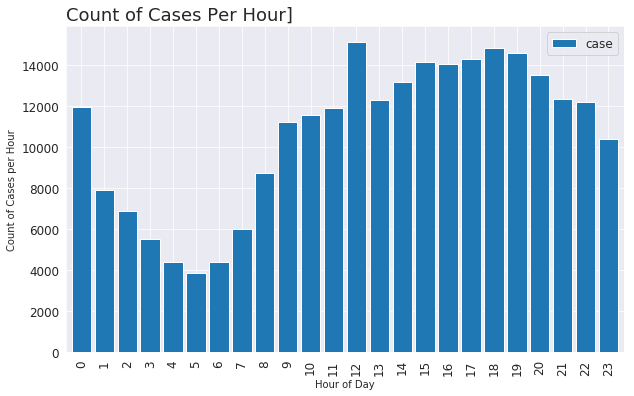

In [24]:
crime.groupby('hour').count().plot(y = 'case',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

In [25]:
crime.primary_description.nunique()

31

In [26]:
crime[['primary_description', 'case']].groupby(
    ['primary_description'], as_index=False).count().sort_values(
    'case', ascending=False).head(3)

,primary_description,case
29,THEFT,61216
2,BATTERY,49478
6,CRIMINAL DAMAGE,26528


In [42]:
top_three_crimes = crime[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:3].axes[0].tolist()

In [43]:
top3_crimes = crime[crime['primary_description'].isin(top_three_crimes)].copy()

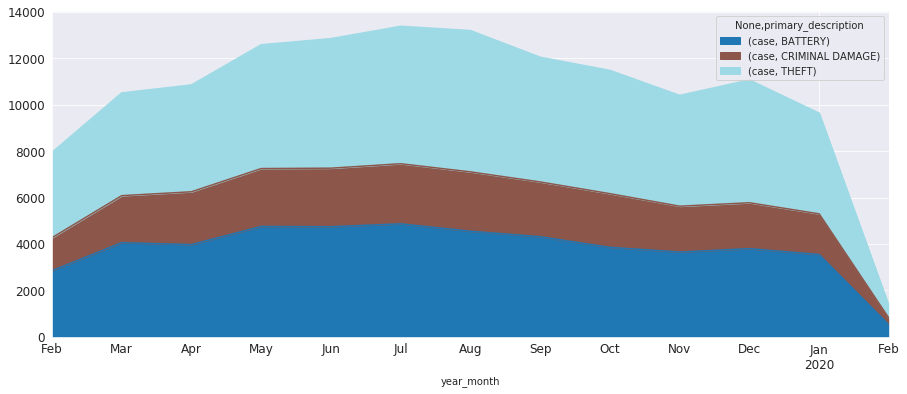

In [44]:
top3_crimes[['case', 'primary_description', 'year_month']].pivot_table(
    index='year_month', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

In [45]:
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
    ]
dict_colours = dict(zip(top3_crimes, colors))
top3_crimes['colour'] = top3_crimes.primary_description.map(dict_colours)
top3_crimes_august = top3_crimes[top3_crimes.month_name == 'August']
top3_crimes_august.to_pickle('crimes_august.pkl')

In [46]:
chicago_latitude = 41.85  
chicago_longitude = -87.75
chicago_map = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)


In [53]:
from folium import plugins
from folium.plugins import HeatMap

chicago_heatmat = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in top3_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(chicago_heatmat)

# Display the map
chicago_heatmat
    

In [48]:

top3_crimes.dtypes

case                             object
date_of_occurrence       datetime64[ns]
block                            object
iucr                             object
primary_description              object
secondary_description            object
location_description             object
arrest                           object
domestic                         object
beat                              int64
ward                            float64
fbi_cd                           object
x_coordinate                    float64
y_coordinate                    float64
latitude                        float64
longitude                       float64
location                         object
hour                              int64
day_name                         object
day                               int64
month_name                       object
month                             int64
year                              int64
year_month                    period[M]
zip                              object


### Explore Chicago Top Venues 

In [56]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
from urllib.request import urlopen
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [57]:
address = 'Chicago'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of chicago are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


The geograpical coordinate of chicago are 41.8755616, -87.6244212.


In [59]:
CLIENT_ID = '02ATSFNMUWCQKNIPOC5JHG4QE1UOVSOKFSI5EEA1ES5I0TMN' 
CLIENT_SECRET = 'TRCIZIBMDSAGQAMAQCP5SETE5BJNQ4MUJ2RWZRRYGQ3ZRGDF'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 02ATSFNMUWCQKNIPOC5JHG4QE1UOVSOKFSI5EEA1ES5I0TMN
CLIENT_SECRET:TRCIZIBMDSAGQAMAQCP5SETE5BJNQ4MUJ2RWZRRYGQ3ZRGDF


In [60]:
LIMIT = 100 
radius = 500 

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=02ATSFNMUWCQKNIPOC5JHG4QE1UOVSOKFSI5EEA1ES5I0TMN&client_secret=TRCIZIBMDSAGQAMAQCP5SETE5BJNQ4MUJ2RWZRRYGQ3ZRGDF&v=20180605&ll=41.8755616,-87.6244212&radius=500&limit=100'

In [61]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e44c2a569babe001bad7474'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'South Loop',
  'headerFullLocation': 'South Loop, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 115,
  'suggestedBounds': {'ne': {'lat': 41.8800616045, 'lng': -87.61838893486689},
   'sw': {'lat': 41.871061595499995, 'lng': -87.63045346513312}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ae786a5f964a52019ac21e3',
       'name': 'Auditorium Theatre',
       'location': {'address': '50 E Congress Pkwy',
        'crossStreet': 'Roosevelt University',
        'lat': 41.87605807115569,
        'lng': -

In [62]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [63]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575
5,Auditorium Building,4d8b6a3c26a36ea8bdc408ae,Concert Hall,41.875858,-87.624565
6,SummerDance,51d09bba498e98300a214039,Dance Studio,41.873804,-87.623335
7,Fontano's Pizza and Subs,5112981fe4b0752e32d37a90,Pizza Place,41.877157,-87.624348
8,Selected Works Used Books & Sheet Music,4b6756cef964a52008492be3,Bookstore,41.876529,-87.624348
9,Fine Arts Building,4acd2667f964a52014cb20e3,General Entertainment,41.876511,-87.624234


In [64]:
nearby_venues['categories'].unique()

array(['Theater', 'Cuban Restaurant', 'Sushi Restaurant', 'Hostel',
       'Donut Shop', 'Concert Hall', 'Dance Studio', 'Pizza Place',
       'Bookstore', 'General Entertainment', 'Liquor Store', 'Hotel',
       'Music Venue', 'Plaza', 'Museum', 'Tapas Restaurant', 'Garden',
       'Salon / Barbershop', 'Trail', 'Restaurant', 'Art Museum',
       'Hotel Bar', 'Indian Restaurant', 'Salad Place', 'Fountain',
       'Market', 'Burger Joint', 'Fried Chicken Joint', 'Park',
       'Gym / Fitness Center', 'Coffee Shop', 'Bubble Tea Shop',
       'Asian Restaurant', 'American Restaurant', 'Arepa Restaurant',
       'Mediterranean Restaurant', 'Snack Place', 'Spanish Restaurant',
       'Ice Cream Shop', 'Bakery', 'Pub', 'Building', 'Sandwich Place',
       'Monument / Landmark', 'Hot Dog Joint', 'Arts & Crafts Store',
       'Boutique', 'Mobile Phone Shop', 'Camera Store',
       'Italian Restaurant', 'Whisky Bar', 'Mexican Restaurant',
       'Performing Arts Venue', 'Café', 'Pharmacy', 'Ex

In [65]:
removal_list = ['Gym / Fitness Center', 'Bakery', 'Park', "Women's Store", 'Sporting Goods Shop', 'Dog Run', 'Gaming Cafe',
               'Optical Shop', 'Yoga Studio', 'Pet Store', 'Shoe Repair', 'Jewelry Store', 'Record Shop', 'Juice Bar', 
               'Cosmetics Shop', 'Business Service', 'Salon / Barbershop', 'Liquor Store', 'Grocery Store', 'Stationery Store',
               'Pilates Studio', 'Dessert Shop', 'Bookstore', 'Concert Hall', 'Video Game Store', 'Pharmacy', 'Mobile Phone Shop',
               'Deli / Bodega']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575
6,SummerDance,51d09bba498e98300a214039,Dance Studio,41.873804,-87.623335
7,Fontano's Pizza and Subs,5112981fe4b0752e32d37a90,Pizza Place,41.877157,-87.624348
9,Fine Arts Building,4acd2667f964a52014cb20e3,General Entertainment,41.876511,-87.624234
11,The Blackstone Hotel,4a411865f964a520c4a41fe3,Hotel,41.873351,-87.624463
12,Buddy Guy's Legends,40b28c80f964a52039fb1ee3,Music Venue,41.873034,-87.626135


In [66]:
venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4ae786a5f964a52019ac21e3',
 '4aba6980f964a520368120e3',
 '4bc7541c15a7ef3b672f79da',
 '4b5f4623f964a5205db129e3',
 '4b5708f9f964a520c02328e3',
 '51d09bba498e98300a214039',
 '5112981fe4b0752e32d37a90',
 '4acd2667f964a52014cb20e3',
 '4a411865f964a520c4a41fe3',
 '40b28c80f964a52039fb1ee3',
 '4c42da24cc410f475c65ad61',
 '4ae3260bf964a520f39021e3',
 '4a7b9022f964a52069eb1fe3',
 '4dcd809cd164679b8ce8159e',
 '4f6f1271e4b0541c62e7a579',
 '58a3360a3493553f56f942a7',
 '4b017ad1f964a520bf4222e3',
 '50ca02c5245f2d4aa8c2c579',
 '4a7cf559f964a52025ee1fe3',
 '59866e4616ef6757600d2419',
 '5525756d498e23c7ea711bc3',
 '4aba79eef964a5207b8120e3',
 '5ac4d4dca6031c16420df48f',
 '49dce73af964a520bb5f1fe3',
 '4f860ac1e4b0da7774b47cac',
 '5396301d498e2660782b078a',
 '5a8d18eb1953f33b9a917208',
 '55872ba7498e487d4277bb53',
 '49e9ef74f964a52011661fe3',
 '5942c26d1ffed75fbc4133f6',
 '5467af9e498e1b95c055253b',
 '4bc9e614fb84c9b666d61b3e',
 '52abe883498e43144d0ece96',
 '5ad627896bdee62101e85460',
 '4d7e70c89df3

In [67]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[365, 437, 81, 136, 28, 16, 63, 53, 128, 558, 14, 242, 233, 48, 14, 11, 69, 33, 606, 10, 39, 654, 14, 199, 81, 179, 5, 47, 3924, 13, 80, 29, 185, 15, 10, 160, 10, 16, 23, 139, 10, 19, 82, 8, 85, 18, 90, 8, 15, 37, 29, 24, 48, 21, 541, 7, 16, 162, 15, 142, 126, 95, 6, 275, 5, 14, 50, 135, 19, 19, 130, 22, 34, 76, 0, 5, 19, 17, 26, 4, 9, 44, 6, 5, 8]


In [68]:
print(len(like_list))
print(len(venue_id_list))

85
85


In [69]:
to_venues = nearby_venues2.copy()
to_venues.head()

,name,id,categories,lat,lng
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575


In [70]:
to_venues['total likes'] = like_list
to_venues.head()

,name,id,categories,lat,lng,total likes
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303,365
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386,437
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534,81
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537,136
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575,28


In [71]:
print(to_venues['total likes'].max())
print(to_venues['total likes'].min())
print(to_venues['total likes'].median())
print(to_venues['total likes'].mean())

3924
0
29.0
135.21176470588236


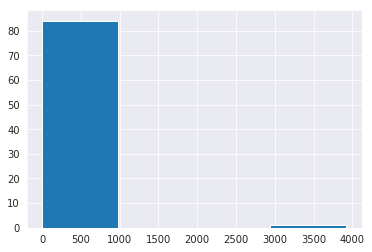

In [72]:
import matplotlib.pyplot as plt
to_venues['total likes'].hist(bins=4)
plt.show()

In [73]:
print(np.percentile(to_venues['total likes'], 25))
print(np.percentile(to_venues['total likes'], 50))
print(np.percentile(to_venues['total likes'], 75))

14.0
29.0
126.0


In [74]:
poor = to_venues['total likes']<=24
below_avg = to_venues[(to_venues['total likes']>24) & (to_venues['total likes']<=45)]
abv_avg = to_venues[(to_venues['total likes']>45) & (to_venues['total likes']<=76)]
great = to_venues['total likes']>76

In [75]:
def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

to_venues['total likes_cat']=to_venues.apply(conditions, axis=1)

In [76]:
to_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303,365,great
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386,437,great
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534,81,great
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537,136,great
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575,28,below avg
6,SummerDance,51d09bba498e98300a214039,Dance Studio,41.873804,-87.623335,16,poor
7,Fontano's Pizza and Subs,5112981fe4b0752e32d37a90,Pizza Place,41.877157,-87.624348,63,avg avg
9,Fine Arts Building,4acd2667f964a52014cb20e3,General Entertainment,41.876511,-87.624234,53,avg avg
11,The Blackstone Hotel,4a411865f964a520c4a41fe3,Hotel,41.873351,-87.624463,128,great
12,Buddy Guy's Legends,40b28c80f964a52039fb1ee3,Music Venue,41.873034,-87.626135,558,great


In [77]:
to_venues['categories'].unique()

array(['Theater', 'Cuban Restaurant', 'Sushi Restaurant', 'Hostel',
       'Donut Shop', 'Dance Studio', 'Pizza Place',
       'General Entertainment', 'Hotel', 'Music Venue', 'Plaza', 'Museum',
       'Tapas Restaurant', 'Garden', 'Trail', 'Restaurant', 'Art Museum',
       'Hotel Bar', 'Indian Restaurant', 'Salad Place', 'Fountain',
       'Market', 'Burger Joint', 'Fried Chicken Joint', 'Coffee Shop',
       'Bubble Tea Shop', 'Asian Restaurant', 'American Restaurant',
       'Arepa Restaurant', 'Mediterranean Restaurant', 'Snack Place',
       'Spanish Restaurant', 'Ice Cream Shop', 'Pub', 'Building',
       'Sandwich Place', 'Monument / Landmark', 'Hot Dog Joint',
       'Arts & Crafts Store', 'Boutique', 'Camera Store',
       'Italian Restaurant', 'Whisky Bar', 'Mexican Restaurant',
       'Performing Arts Venue', 'Café', 'Exhibit', 'Speakeasy', 'Lounge',
       'Chinese Restaurant', 'Thai Restaurant', 'Farmers Market',
       'Convenience Store'], dtype=object)

In [78]:
bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop']
euro_asia_indian_food = ['Falafel Restaurant', 'Korean Restaurant','Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

to_venues['categories_new']=to_venues.apply(conditions2, axis=1)

In [79]:
to_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303,365,great,None
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386,437,great,mex southam food
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534,81,great,euro asia indian food
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537,136,great,None
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575,28,below avg,other
6,SummerDance,51d09bba498e98300a214039,Dance Studio,41.873804,-87.623335,16,poor,None
7,Fontano's Pizza and Subs,5112981fe4b0752e32d37a90,Pizza Place,41.877157,-87.624348,63,avg avg,italian food
9,Fine Arts Building,4acd2667f964a52014cb20e3,General Entertainment,41.876511,-87.624234,53,avg avg,None
11,The Blackstone Hotel,4a411865f964a520c4a41fe3,Hotel,41.873351,-87.624463,128,great,None
12,Buddy Guy's Legends,40b28c80f964a52039fb1ee3,Music Venue,41.873034,-87.626135,558,great,None


In [80]:
# one hot encoding
to_onehot = pd.get_dummies(to_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Name'] = to_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

to_onehot.head()

,Name,american food,bars,euro asia indian food,italian food,mex southam food,other,avg avg,below avg,great,poor
0,Auditorium Theatre,0,0,0,0,0,0,0,0,1,0
1,Cafecito,0,0,0,0,1,0,0,0,1,0
2,Osaka Sushi Express & Fresh Fruit Smoothies,0,0,1,0,0,0,0,0,1,0
3,Hostelling International Chicago,0,0,0,0,0,0,0,0,1,0
4,Dunkin',0,0,0,0,0,1,0,1,0,0


In [81]:
cluster_df = to_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 3, 1, 2, 2, 0, 0], dtype=int32)

In [82]:
to_venues['label'] = kmeans.labels_
to_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303,365,great,None,0
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386,437,great,mex southam food,0
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534,81,great,euro asia indian food,0
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537,136,great,None,0
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575,28,below avg,other,3


### cluster 1

In [84]:
to_venues.loc[to_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Auditorium Theatre,4ae786a5f964a52019ac21e3,Theater,41.876058,-87.625303,365,great,None,0
1,Cafecito,4aba6980f964a520368120e3,Cuban Restaurant,41.875724,-87.626386,437,great,mex southam food,0
2,Osaka Sushi Express & Fresh Fruit Smoothies,4bc7541c15a7ef3b672f79da,Sushi Restaurant,41.876969,-87.624534,81,great,euro asia indian food,0
3,Hostelling International Chicago,4b5f4623f964a5205db129e3,Hostel,41.875757,-87.626537,136,great,None,0
11,The Blackstone Hotel,4a411865f964a520c4a41fe3,Hotel,41.873351,-87.624463,128,great,None,0
12,Buddy Guy's Legends,40b28c80f964a52039fb1ee3,Music Venue,41.873034,-87.626135,558,great,None,0
14,Chicago Architecture Foundation,4ae3260bf964a520f39021e3,Museum,41.878556,-87.624550,242,great,None,0
15,Mercat a la Planxa,4a7b9022f964a52069eb1fe3,Tapas Restaurant,41.873212,-87.624481,233,great,None,0
23,Hilton,4a7cf559f964a52025ee1fe3,Hotel,41.872694,-87.624733,606,great,None,0
26,Clarence Buckingham Memorial Fountain,4aba79eef964a5207b8120e3,Fountain,41.875939,-87.619330,654,great,None,0


### 

### cluster 2

In [85]:
to_venues.loc[to_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
6,SummerDance,51d09bba498e98300a214039,Dance Studio,41.873804,-87.623335,16,poor,None,1
13,Congress Plaza,4c42da24cc410f475c65ad61,Plaza,41.875684,-87.624015,14,poor,None,1
18,Shamrock Shuffle Start Line & Corrals,4f6f1271e4b0541c62e7a579,Trail,41.876262,-87.621239,14,poor,None,1
19,Luna Cafe Restaurant,58a3360a3493553f56f942a7,Restaurant,41.874671,-87.625525,11,poor,american food,1
24,Himalayan Restaurant,59866e4616ef6757600d2419,Indian Restaurant,41.874129,-87.626064,10,poor,euro asia indian food,1
27,Beatrix Market,5ac4d4dca6031c16420df48f,Market,41.878223,-87.626863,14,poor,None,1
33,Blaze Pizza,5a8d18eb1953f33b9a917208,Pizza Place,41.875233,-87.627468,5,poor,italian food,1
36,BIBIBOP Asian Grill,5942c26d1ffed75fbc4133f6,Asian Restaurant,41.878274,-87.626503,13,poor,None,1
40,Bien Mesabe,5ad627896bdee62101e85460,Arepa Restaurant,41.879559,-87.626136,15,poor,None,1
41,I Dream of Falafel,4d7e70c89df3f04dc97bc494,Mediterranean Restaurant,41.878297,-87.625797,10,poor,None,1


### cluster3

In [86]:
to_venues.loc[to_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
7,Fontano's Pizza and Subs,5112981fe4b0752e32d37a90,Pizza Place,41.877157,-87.624348,63,avg avg,italian food,2
9,Fine Arts Building,4acd2667f964a52014cb20e3,General Entertainment,41.876511,-87.624234,53,avg avg,None,2
16,The South Garden,4dcd809cd164679b8ce8159e,Garden,41.878626,-87.624207,48,avg avg,None,2
20,Museum of Contemporary Photography,4b017ad1f964a520bf4222e3,Art Museum,41.874382,-87.624524,69,avg avg,None,2
34,Vivi Bubble Tea,55872ba7498e487d4277bb53,Bubble Tea Shop,41.877247,-87.627874,47,avg avg,other,2
63,Spanglish,511ec90de4b0c674331f7192,Mexican Restaurant,41.874611,-87.627423,48,avg avg,mex southam food,2
79,Members' Lounge,4bbfb622461576b0ea0d7932,Coffee Shop,41.879596,-87.621876,50,avg avg,other,2
87,Peet's Coffee & Tea,542edd7a498e9f625bee4acd,Coffee Shop,41.871702,-87.626020,76,avg avg,other,2


### cluster 4

In [87]:
to_venues.loc[to_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Dunkin',4b5708f9f964a520c02328e3,Donut Shop,41.876768,-87.624575,28,below avg,other,3
21,720 South Bar & Grill,50ca02c5245f2d4aa8c2c579,Hotel Bar,41.872916,-87.624350,33,below avg,None,3
25,Just Salad,5525756d498e23c7ea711bc3,Salad Place,41.878226,-87.626779,39,below avg,None,3
38,Thorne Miniature Rooms,4bc9e614fb84c9b666d61b3e,Museum,41.879532,-87.623680,29,below avg,None,3
60,Central Camera Company,4a735cc2f964a52044dc1fe3,Camera Store,41.878661,-87.626300,37,below avg,None,3
61,Sofi Restaurant,51d896fc498ea6557a53478f,Italian Restaurant,41.873880,-87.629105,29,below avg,italian food,3
86,Panda Express,4ee80effa69d4c7d8788954a,Chinese Restaurant,41.875095,-87.627517,34,below avg,None,3
92,Amarit Thai Restaurant,4b3aca57f964a5207b6e25e3,Thai Restaurant,41.874302,-87.629124,26,below avg,euro asia indian food,3
95,Dunkin',4b031e19f964a520ca4c22e3,Donut Shop,41.874235,-87.626222,44,below avg,other,3
